<a href="https://colab.research.google.com/github/sbesinski/kaggle_ML/blob/main/california_house_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = fetch_california_housing()
df = pd.concat([
    pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
    pd.DataFrame(dataset['target'], columns=dataset['target_names'])],
    axis=1
)

In [2]:
df.columns[:10]

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline

feature_names = df.columns[:-1]
target_name = df.columns[-1]

In [4]:
feature_names, target_name

(Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
        'Latitude', 'Longitude'],
       dtype='object'),
 'MedHouseVal')

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [6]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [7]:
df_scaled

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,-1.115804
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,-1.124470
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,-0.992746
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,-1.058608


In [8]:
X = df_scaled[feature_names]
y = df_scaled[[target_name]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512, 1), (4128, 1))

In [10]:
df_scaled[target_name]

,MedHouseVal
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900
...,...
20635,-1.115804
20636,-1.124470
20637,-0.992746
20638,-1.058608


In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('regressor', LinearRegression())  # Linear regression model
])

model = pipeline.fit(X_train, y_train)
predicted_train_set = model.predict(X_train)
predicted_test_set = model.predict(X_test)

In [12]:
model.score(X_train, y_train)

0.6125511913966952

In [13]:
mae = mean_absolute_error(y_train, predicted_train_set)
print("mae: ", mae)
mse = mean_squared_error(y_train, predicted_train_set)
print("mse: ", mse)
r2 = r2_score(y_train, predicted_train_set)
print("r2: ", r2)

mae:  0.45811200194852647
mse:  0.38897000398171144
r2:  0.6125511913966952


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('regressor', RandomForestRegressor())  # Linear regression model
])

model = pipeline.fit(X_train, y_train)
predicted_train_set = model.predict(X_train)
predicted_test_set = model.predict(X_test)

mae = mean_absolute_error(y_train, predicted_train_set)
print("mae: ", mae)
mse = mean_squared_error(y_train, predicted_train_set)
print("mse: ", mse)
rmse = np.sqrt(mse)
print("rmse: ", rmse)
r2 = r2_score(y_train, predicted_train_set)
print("r2: ", r2)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


mae:  0.10595250724928094
mse:  0.026680751990888797
rmse:  0.16334243781359697
r2:  0.9734235918819175


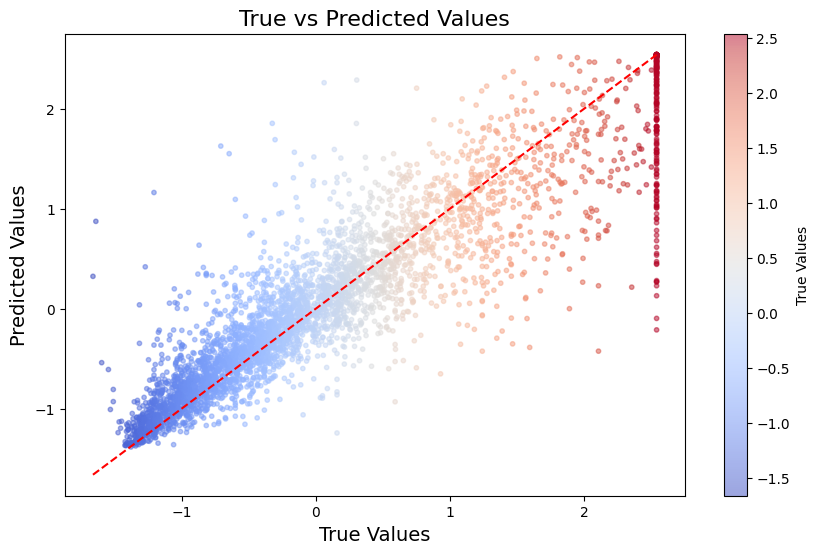

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize

# Assuming you have your trained model, and X_test, y_test as input/output
y_pred = model.predict(X_test)

# Ensure both y_pred and y_test are 1-dimensional
y_pred = np.ravel(y_pred)  # Flatten y_pred
y_test = np.ravel(y_test)  # Flatten y_test if it's 2D

# Create DataFrame for plotting
plot_data = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Set up the plot
plt.figure(figsize=(10, 6))

# Normalize the 'True Values' for color mapping
norm = Normalize(vmin=min(plot_data['True Values']), vmax=max(plot_data['True Values']))

# Using the 'True Values' to determine the color of the points with normalization
scatter = plt.scatter(plot_data['True Values'], plot_data['Predicted Values'],
                      c=plot_data['True Values'], cmap='coolwarm', s=10, alpha=0.5, norm=norm)

# Add a colorbar to indicate the color scale
plt.colorbar(scatter, label='True Values')  # Add the colorbar with label

# Add a regression line if needed
plt.plot([min(plot_data['True Values']), max(plot_data['True Values'])],
         [min(plot_data['True Values']), max(plot_data['True Values'])], color='red', linestyle='--')

# Title and axis labels
plt.title('True vs Predicted Values', fontsize=16)  # Title of the plot
plt.xlabel('True Values', fontsize=14)  # Label for the x-axis
plt.ylabel('Predicted Values', fontsize=14)  # Label for the y-axis

# Display the plot
plt.show(block=True)